# Project: Wrangling and Analyze Data

In [9]:
# Importing useful libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import requests
import re
import tweepy
%matplotlib inline


## Data Gathering
In the cells below, **All** three pieces of data for this project are gathered and loaded in the notebook, employing different approaches.


1. WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) is downloaded and loaded into pandas dataframe.

In [10]:
df_doggo = pd.read_csv('twitter-archive-enhanced.csv') 

2. The Requests library is employed to programmatically download the tweet image prediction (image_predictions.tsv) for scalability and reproducibility.

In [8]:
# The url is downloaded programatically and defined. Requests.get method is employed and the tsv file is read into pandas dataframe.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Writing the contents of the file and saving it to file on the computer

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# TSV file is read
twitter_image_predict = pd.read_csv('image-predictions.tsv', sep='\t' )

3. Tweepy library is then employed to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_doggo.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [10]:
tweet_json = tweet_json[['tweet_id','retweet_count','favorite_count']]
tweet_json.head()

NameError: name 'tweet_json' is not defined

## Assessing Data
In this section, I detected and documented eight (8) quality issues and two (2) tidiness issue. I employed both visual assessment and programmatic assessement to assess all the dataframes.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.





### Visual Assessment of data

In [8]:
df_doggo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
twitter_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [73]:
my_tweet_json.head()

,tweet_id,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url


### Programmatic Assessment

Twitter archive is programmatically assessed first

In [11]:
df_doggo.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_doggo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_doggo.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
df_doggo.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
df_doggo.duplicated().sum()

0

Programmatic Assessment of  twitter image predict

In [16]:
twitter_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
twitter_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
twitter_image_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.01411,True,gibbon,0.002358,False
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan,0.984725,True,Pembroke,0.00873,True,kelpie,0.002195,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.21783,True,toy_terrier,0.089149,True
203,669749430875258880,https://pbs.twimg.com/media/CUttjYtWcAAdPgI.jpg,1,washbasin,0.245794,False,toilet_seat,0.10942,False,paper_towel,0.105664,False
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.27827,False,Arabian_camel,0.063503,False


In [19]:
twitter_image_predict.duplicated().sum()

0

Programmatic Assessment of my_tweet_json

In [20]:
my_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          0 non-null      object
 1   followers_count   0 non-null      object
 2   retweet_count     0 non-null      object
 3   favorite_count    0 non-null      object
 4   whole_tweet       0 non-null      object
 5   retweeted_status  0 non-null      object
 6   url               0 non-null      object
dtypes: object(7)
memory usage: 0.0+ bytes


In [21]:
my_tweet_json.isnull().sum()

tweet_id            0.0
followers_count     0.0
retweet_count       0.0
favorite_count      0.0
whole_tweet         0.0
retweeted_status    0.0
url                 0.0
dtype: float64

In [51]:
my_tweet_json.duplicated().sum()

0

### Quality issues
Quality Issues or dirty data encounted in visual and programmatic assessment of the three (3) dataframes are documented to check for completeness, validity, accuracy, and consitency.

#### dp_doggo dataframe

1. Some columns are not useful for analysis.

2. Datatype of timestamp column is not correct.

3. One column consisting of day, month , and year for the timestamp.

4. Data of doggo, floofer, pupper and puppo columns are not under one column.

5. Some columns have  non-available or null data.

#### twitter_image_predict

6. Too many columns to present image dog prediction.

7. Some columns are not useful in my analysis.

#### my_tweet_json

8. Just a retweet in url column is not an original tweet.

### Tidiness issues

1. The datatype of tweet_id in my_tweet_json table is erronous and can't be merged with the other dataframes for analysis.
2. All the 3 tables are not in one dataset for analysis and visualization.

## Cleaning Data
In this section,  I attempt to clean clean all of the issues documented while I assessed the three (3) dataframes. 

**Copies of the original data is made before cleaning is initiated on the dataframe** 


In [492]:
# Making copies of original pieces of data

df_doggo_clean = df_doggo.copy()
twitter_image_predict_clean = twitter_image_predict.copy()
my_tweet_json_clean = my_tweet_json.copy()

### Issue #1: Some columns are not useful for analysis.

#### 1. df_doggo : Delete columns that won't be useful in data analysis

#### Code

In [493]:
# Deleting columns not needed. Columns include not needed include :'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
                                                    #'retweeted_status_timestamp', 'expanded_urls','source']

print(list(df_doggo_clean))


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [494]:
df_doggo_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 'expanded_urls','source'], axis = 1, inplace = True)

#### Test

In [495]:
print(list(df_doggo_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


### Issue #2: Datatype of timestamp column is not correct.

#### df_doggo 2: Convert datatype of timestamp from object to datetime

#### Code

In [496]:
#converting timestamp to correct datatype datetime
df_doggo_clean['timestamp'] = pd.to_datetime(df_doggo_clean['timestamp'])


#### Test

In [497]:
df_doggo_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #3: One column consisting of day, month , and year for the timestamp 

#### df_doggo 3: Timestamp is separated into day, month, and year

#### Code

In [498]:
# Separating day, month, and year

df_doggo_clean['day'] = df_doggo_clean['timestamp'].dt.day
df_doggo_clean['month'] = df_doggo_clean['timestamp'].dt.month
df_doggo_clean['year'] = df_doggo_clean['timestamp'].dt.year

In [499]:
# Dropping timestamp column
df_doggo_clean.drop(columns = 'timestamp', axis = 1, inplace = True)

#### Test

In [500]:
print(list(df_doggo_clean))  

['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'day', 'month', 'year']


### Issue #4: Data of doggo, floofer, pupper and puppo columns are not under one column. 

#### df_doggo 4: Combining all columns to form one column

#### Code

In [501]:
df_doggo_clean['dog_level'] = df_doggo_clean['doggo'].str.cat(df_doggo_clean[['floofer','pupper','puppo']], sep=',')

In [502]:
# Dropping doggo, floofer, pupper and puppo columns

df_doggo_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

#### Test

In [503]:
df_doggo_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,8,2017,"None,None,None,None"
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,8,2017,"None,None,None,None"
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,31,7,2017,"None,None,None,None"
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,30,7,2017,"None,None,None,None"
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,29,7,2017,"None,None,None,None"


### Issue #5: Some columns have  non-available or null data

#### df_doggo 5: Dropping all columns with non-available or null data

#### Code

In [504]:
df_doggo_clean.dropna()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,8,2017,"None,None,None,None"
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,8,2017,"None,None,None,None"
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,31,7,2017,"None,None,None,None"
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,30,7,2017,"None,None,None,None"
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,29,7,2017,"None,None,None,None"
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,16,11,2015,"None,None,None,None"
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,16,11,2015,"None,None,None,None"
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,15,11,2015,"None,None,None,None"
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,15,11,2015,"None,None,None,None"


#### Test

In [505]:
print(list(df_doggo_clean))

['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'day', 'month', 'year', 'dog_level']


In [506]:
df_doggo_clean.isna().sum()

tweet_id              0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
day                   0
month                 0
year                  0
dog_level             0
dtype: int64

### Issue #6: Too many columns to present image dog prediction

#### twitter_image_predict 6: Creating a coloumn to represent image dog prediction 

#### Code

In [507]:
## Creating image dog prediction column

##twitter_image_predict_clean['dog_predict'] = twitter_image_predict_clean['img_num'].apply(lambda x : x == int(0))

In [508]:
## Confiriming newly created columns

print(list(twitter_image_predict_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


In [509]:
# Function to select the first true prediction and append it to dog_predict column
dog_typepredict = []
def predict(twitter_image_predict_clean):
    if twitter_image_predict_clean['p1_dog'] == True:
        dog_typepredict.append(twitter_image_predict_clean['p1'])
    elif twitter_image_predict_clean['p2_dog'] == True:
        dog_typepredict.append(twitter_image_predict_clean['p2'])
    elif twitter_image_predict_clean['p3_dog'] == True:
        dog_typepredict.append(twitter_image_predict_clean['p3'])
    else:
        dog_typepredict.append('Please, this is an error')

#series objects having index the image_prediction_clean column.        
twitter_image_predict_clean.apply(predict,axis = 1)

twitter_image_predict_clean['dog_predict'] = dog_typepredict

# Eliminating rows with no true predictions 
twitter_image_predict_clean = twitter_image_predict_clean[twitter_image_predict_clean['dog_predict'] !='Please, this is an error']

#### Test

In [510]:
twitter_image_predict_clean.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_predict
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,French_bulldog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,Pembroke
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True,Siberian_husky
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True,golden_retriever
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,golden_retriever
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True,whippet
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,golden_retriever
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,French_bulldog
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,Pembroke
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,French_bulldog


### Issue #7: Some columns are not useful in my analysis.

#### tweet_image_predict 7: Drop columns not needed for analysis

#### Code

In [511]:
twitter_image_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis = 1, inplace = True)

#### Test

In [512]:
twitter_image_predict_clean.tail()

,tweet_id,jpg_url,dog_predict
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


### Issue #8: 'Just a retweet' in url column is not an original tweet.

#### my_tweet_json 8: Eliminating all just retweets in url columns
and keeping original tweets

#### Code

In [513]:
my_tweet_json_clean = my_tweet_json_clean[my_tweet_json_clean['retweeted_status'] != 'just retweet']



#### Test

In [514]:
my_tweet_json_clean['retweeted_status'].value_counts()

Series([], Name: retweeted_status, dtype: int64)

In [515]:
my_tweet_json_clean.head()

,tweet_id,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url


### Tidiness Issue 1 : The datatype of tweet_id in my_tweet_json table is erronous and can't be merged with the other dataframes for analysis. 

#### Define 1 : tweet_id datatype in my_tweet_json table is converted to int

#### Code

In [516]:
my_tweet_json_clean['tweet_id'] = my_tweet_json_clean['tweet_id'].astype(int)


#### Test

In [517]:
my_tweet_json_clean['tweet_id'].dtypes

dtype('int32')

### Tidiness Issue 2 : All the 3 dataframes are not in one dataset for efficient analysis and visualization.

#### Define 2 : Merging all the 3 dataframes into one data set

#### Code

In [518]:
# Creating an initial dataframe to merge df_doggo and twitter_image_predict joining on tweet_id column

twitter_archive = pd.merge(df_doggo_clean, twitter_image_predict_clean, how = 'right' , on = ['tweet_id'])

#### Test

In [519]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1751 non-null   int64 
 1   text                1751 non-null   object
 2   rating_numerator    1751 non-null   int64 
 3   rating_denominator  1751 non-null   int64 
 4   name                1751 non-null   object
 5   day                 1751 non-null   int64 
 6   month               1751 non-null   int64 
 7   year                1751 non-null   int64 
 8   dog_level           1751 non-null   object
 9   jpg_url             1751 non-null   object
 10  dog_predict         1751 non-null   object
dtypes: int64(6), object(5)
memory usage: 164.2+ KB


#### Code

In [520]:
#  new dataframe that merge twitter_arcghive and my_tweet_json_clean

twitter_archive_master = pd.merge(twitter_archive, my_tweet_json_clean, how = 'left', on = ['tweet_id'])

#### Test

In [521]:
twitter_archive_master.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level,jpg_url,dog_predict,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,15,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,NaN,NaN,NaN,NaN,NaN,NaN
1,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,15,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,NaN,NaN,NaN,NaN,NaN,NaN
2,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,15,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,NaN,NaN,NaN,NaN,NaN,NaN
3,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,16,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,NaN,NaN,NaN,NaN,NaN,NaN
4,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,16,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,NaN,NaN,NaN,NaN,NaN,NaN


In [522]:
twitter_archive_master.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level,jpg_url,dog_predict,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url
526,683462770029932544,"""Hello forest pupper I am house pupper welcome...",8,10,None,3,1,2016,"None,None,pupper,None",https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,Italian_greyhound,NaN,NaN,NaN,NaN,NaN,NaN
598,688916208532455424,This pupper just wants to say hello. 11/10 wou...,11,10,None,18,1,2016,"None,None,pupper,None",https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,Pembroke,NaN,NaN,NaN,NaN,NaN,NaN
73,667530908589760512,Meet Naphaniel. He doesn't necessarily enjoy h...,10,10,Naphaniel,20,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,NaN
955,736365877722001409,This is Rory. He's extremely impatient. 11/10 ...,11,10,Rory,28,5,2016,"None,None,pupper,None",https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,toy_poodle,NaN,NaN,NaN,NaN,NaN,NaN
351,675006312288268288,Say hello to Mollie. This pic was taken after ...,10,10,Mollie,10,12,2015,"None,None,pupper,None",https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,boxer,NaN,NaN,NaN,NaN,NaN,NaN
126,668902994700836864,Meet Lambeau. He's a Whistling Haiku from the ...,11,10,Lambeau,23,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,Brittany_spaniel,NaN,NaN,NaN,NaN,NaN,NaN
127,668932921458302977,This is Herald. He likes to swing. Subtle tong...,9,10,Herald,23,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CUiG6_ZXAAAPaw_.jpg,standard_poodle,NaN,NaN,NaN,NaN,NaN,NaN
149,669375718304980992,This is Billl. He's trying to be a ghost but h...,6,10,Billl,25,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,Airedale,NaN,NaN,NaN,NaN,NaN,NaN
1503,830956169170665475,Say hello to Reggie. He hates puns. 12/10 ligh...,12,10,Reggie,13,2,2017,"None,None,None,None",https://pbs.twimg.com/ext_tw_video_thumb/83095...,kuvasz,NaN,NaN,NaN,NaN,NaN,NaN
582,687480748861947905,Another magnificent photo. 12/10 https://t.co/...,12,10,None,14,1,2016,"None,None,None,None",https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,English_springer,NaN,NaN,NaN,NaN,NaN,NaN


In [523]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1751 non-null   int64 
 1   text                1751 non-null   object
 2   rating_numerator    1751 non-null   int64 
 3   rating_denominator  1751 non-null   int64 
 4   name                1751 non-null   object
 5   day                 1751 non-null   int64 
 6   month               1751 non-null   int64 
 7   year                1751 non-null   int64 
 8   dog_level           1751 non-null   object
 9   jpg_url             1751 non-null   object
 10  dog_predict         1751 non-null   object
 11  followers_count     0 non-null      object
 12  retweet_count       0 non-null      object
 13  favorite_count      0 non-null      object
 14  whole_tweet         0 non-null      object
 15  retweeted_status    0 non-null      object
 16  url                 0 no

## Tidiness Issue 3: No column for computed rating

#### Creating column for computed dog rating over 100  from the rating numerator and the rating denominator

#### Code

In [524]:
#### Percentage rating for dogs

twitter_archive_master['final_rating'] = 100 * twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator']

In [525]:
####coverting rating datatype to float

twitter_archive_master['final_rating'] .astype(float)

0        80.0
1        70.0
2        90.0
3        60.0
4        50.0
        ...  
1746    130.0
1747    120.0
1748    130.0
1749    120.0
1750    130.0
Name: final_rating, Length: 1751, dtype: float64

#### Test

In [526]:
twitter_archive_master.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level,jpg_url,dog_predict,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url,final_rating
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,15,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,NaN,NaN,NaN,NaN,NaN,NaN,80.0
1,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,15,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,NaN,NaN,NaN,NaN,NaN,NaN,70.0
2,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,15,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,NaN,NaN,NaN,NaN,NaN,NaN,90.0
3,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,16,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,NaN,NaN,NaN,NaN,NaN,NaN,60.0
4,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,16,11,2015,"None,None,None,None",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,NaN,NaN,NaN,NaN,NaN,NaN,50.0


In [527]:
twitter_archive_master['final_rating']

0        80.0
1        70.0
2        90.0
3        60.0
4        50.0
        ...  
1746    130.0
1747    120.0
1748    130.0
1749    120.0
1750    130.0
Name: final_rating, Length: 1751, dtype: float64

In [528]:
#### Dropping column dog_level since it won't be neccessary in my analysis


twitter_archive_master.drop( 'dog_level', axis = 1, inplace = True )

In [529]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1751 non-null   int64  
 1   text                1751 non-null   object 
 2   rating_numerator    1751 non-null   int64  
 3   rating_denominator  1751 non-null   int64  
 4   name                1751 non-null   object 
 5   day                 1751 non-null   int64  
 6   month               1751 non-null   int64  
 7   year                1751 non-null   int64  
 8   jpg_url             1751 non-null   object 
 9   dog_predict         1751 non-null   object 
 10  followers_count     0 non-null      object 
 11  retweet_count       0 non-null      object 
 12  favorite_count      0 non-null      object 
 13  whole_tweet         0 non-null      object 
 14  retweeted_status    0 non-null      object 
 15  url                 0 non-null      object 
 16  final_

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [530]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled dataset to provide insights and enhanced communication

In [531]:
# Dataset for analysis and visualization

twitter_archive_master.head(10)

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,jpg_url,dog_predict,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url,final_rating
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,15,11,2015,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,NaN,NaN,NaN,NaN,NaN,NaN,80.0
1,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,15,11,2015,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,NaN,NaN,NaN,NaN,NaN,NaN,70.0
2,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,15,11,2015,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,NaN,NaN,NaN,NaN,NaN,NaN,90.0
3,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,16,11,2015,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,NaN,NaN,NaN,NaN,NaN,NaN,60.0
4,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,16,11,2015,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,NaN,NaN,NaN,NaN,NaN,NaN,50.0
5,666050758794694657,This is a truly beautiful English Wilson Staff...,10,10,a,16,11,2015,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,NaN,NaN,NaN,NaN,NaN,NaN,100.0
6,666055525042405380,Here is a Siberian heavily armored polar bear ...,10,10,a,16,11,2015,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,NaN,NaN,NaN,NaN,NaN,NaN,100.0
7,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9,10,a,16,11,2015,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,NaN,90.0
8,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,8,10,the,16,11,2015,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,NaN,NaN,NaN,NaN,NaN,NaN,80.0
9,666063827256086533,This is the happiest dog you will ever see. Ve...,10,10,the,16,11,2015,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,NaN,100.0


### Insight one  What  predicted dog type had the highest average rating and the lowest average rating ?
 

In [534]:
# Code to group predicted dog types according to their mean.

dog_predict_type_mean = twitter_archive_master.groupby('dog_predict').mean()
dog_predict_type_mean

,tweet_id,rating_numerator,rating_denominator,day,month,year,final_rating
dog_predict,,,,,,,
Afghan_hound,8.111755e+17,10.500000,10.0,12.250000,6.250000,2016.500000,105.000000
Airedale,7.184489e+17,9.833333,10.0,15.916667,8.750000,2015.583333,98.333333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,15.000000,5.250000,2016.187500,103.125000
Appenzeller,7.939334e+17,11.000000,10.0,18.500000,4.500000,2016.500000,110.000000
Australian_terrier,7.785921e+17,11.500000,10.0,7.000000,3.500000,2016.500000,115.000000
...,...,...,...,...,...,...,...
toy_poodle,7.219281e+17,11.057692,10.0,14.211538,7.576923,2015.711538,110.576923
toy_terrier,7.166375e+17,10.333333,10.0,23.333333,11.333333,2015.333333,103.333333
vizsla,7.417263e+17,10.928571,10.0,17.928571,9.214286,2015.714286,109.285714


Sorting the mean values to show the maximum and minimum

In [536]:
dog_predict_type_mean['final_rating'].sort_values()

dog_predict
Japanese_spaniel                50.000000
soft-coated_wheaten_terrier     88.000000
Scotch_terrier                  90.000000
Walker_hound                    90.000000
Tibetan_terrier                 92.500000
                                  ...    
Tibetan_mastiff                124.000000
Pomeranian                     124.761905
Saluki                         125.000000
Bouvier_des_Flandres           130.000000
clumber                        270.000000
Name: final_rating, Length: 113, dtype: float64

#### From the analysis above analysis, japanese_spaniel had the lowest average dog ratings and the clumber had the highest dog rating among all the dog types

### Insight two Which predicted dog type was commonly rated among all the dog types.

Code to check the frequency/number of counts of predicted dogs

In [538]:
twitter_archive_master['dog_predict'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_predict, Length: 113, dtype: int64

#### From the above analysis, the golden retriever was the most common rated dog in the dataset

Code to select and group predicted dog types with value counts equals to or greater to 50.

In [557]:
dog_type_freq = twitter_archive_master.groupby('dog_predict').filter(lambda x: len(x) >= 50)
dog_type_freq

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,jpg_url,dog_predict,followers_count,retweet_count,favorite_count,whole_tweet,retweeted_status,url,final_rating
6,666055525042405380,Here is a Siberian heavily armored polar bear ...,10,10,a,16,11,2015,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,NaN,NaN,NaN,NaN,NaN,NaN,100.0
7,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9,10,a,16,11,2015,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,NaN,90.0
9,666063827256086533,This is the happiest dog you will ever see. Ve...,10,10,the,16,11,2015,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,NaN,100.0
12,666082916733198337,Here we have a well-established sunblockerspan...,6,10,None,16,11,2015,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,NaN,NaN,NaN,NaN,NaN,NaN,60.0
19,666345417576210432,Look at this jokester thinking seat belt laws ...,10,10,None,16,11,2015,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,889665388333682689,Here's a puppo that seems to be on the fence a...,13,10,None,25,7,2017,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,NaN,NaN,NaN,NaN,NaN,NaN,130.0
1742,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,26,7,2017,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,NaN,NaN,NaN,NaN,NaN,NaN,140.0
1748,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,30,7,2017,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,NaN,NaN,NaN,NaN,NaN,NaN,130.0
1749,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,31,7,2017,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,NaN,NaN,NaN,NaN,NaN,NaN,120.0


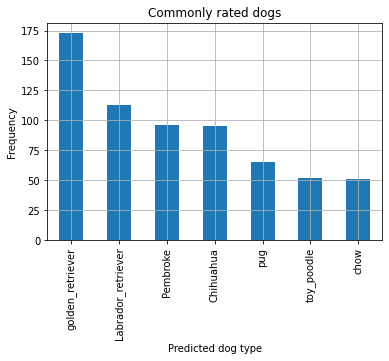

In [600]:
# Code : To plot a bar chart to show the count rate levels of the predicted dog types 

dog_type_freq['dog_predict'].value_counts().plot(kind = 'bar')

plt.xlabel('Predicted dog type') 
plt.ylabel('Frequency')
plt.title('Commonly rated dogs')
plt.grid()

Bar chart visualization showing golden retriever as the most commonly rated dog. 

### Insight three : Do dogs with higher rating counts (commonly rated dogs) have high or low average ratings ?

In [585]:
# Calling dog_predict_type_mean variable ( mean of the final ratings, grouped by dog_predict)

dog_predict_average = twitter_archive_master.groupby('dog_predict')['final_rating'].mean()
dog_predict_average

dog_predict
Afghan_hound                      105.000000
Airedale                           98.333333
American_Staffordshire_terrier    103.125000
Appenzeller                       110.000000
Australian_terrier                115.000000
                                     ...    
toy_poodle                        110.576923
toy_terrier                       103.333333
vizsla                            109.285714
whippet                           101.818182
wire-haired_fox_terrier           115.000000
Name: final_rating, Length: 113, dtype: float64

In [586]:
# Calling dog_predict_count variable ( counts of the final ratings, grouped by dog_predict)
dog_predict_count = twitter_archive_master.groupby('dog_predict')['final_rating'].count()
dog_predict_count

dog_predict
Afghan_hound                       4
Airedale                          12
American_Staffordshire_terrier    16
Appenzeller                        2
Australian_terrier                 2
                                  ..
toy_poodle                        52
toy_terrier                        3
vizsla                            14
whippet                           11
wire-haired_fox_terrier            2
Name: final_rating, Length: 113, dtype: int64

In [592]:
# Creating a table/dataframe for plotting
dog_predict_count
dog_predict_average
dog_mean_counts = pd.DataFrame(columns = ['dog_predict_count','dog_predict_average'])
dog_mean_counts['dog_predict_count'] = dog_predict_count
dog_mean_counts['dog_predict_average'] = dog_predict_average

dog_mean_counts 

,dog_predict_count,dog_predict_average
dog_predict,,
Afghan_hound,4,105.000000
Airedale,12,98.333333
American_Staffordshire_terrier,16,103.125000
Appenzeller,2,110.000000
Australian_terrier,2,115.000000
...,...,...
toy_poodle,52,110.576923
toy_terrier,3,103.333333
vizsla,14,109.285714


### Visualization

Text(0.5, 1.0, 'Average Rating of Dog Type by Number of Ratings of a Dog')

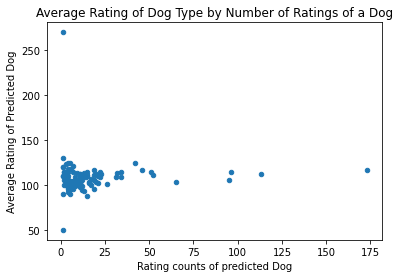

In [596]:
# A scatter plot code to show the variation between average rating of predicted dog and rating counts of predicted dogs

dog_mean_counts.plot(x='dog_predict_count', y='dog_predict_average', kind='scatter')
plt.xlabel('Rating counts of predicted Dog')
plt.ylabel('Average Rating of Predicted Dog')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog')

It can be seen from the visualization above that predicted dog types with low rating counts depicted lower average ratings.

### Insights:
1. Japanese_spaniel has the lowest average dog rating and clumber has the highest dog rating.

2. The golden retriever was the most common dog rated in the dataset followed by labrador retriever.

3. Predicted dog types with low rating counts showed low average ratings.

### References

1. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html


2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html


3. https://www.kaggle.com/datasets/shamiulislamshifat/weratedogs-twitterapi/code


4. https://www.kaggle.com/code/edemdoehonu/data-wrangling-and-analysis/edit